# about the dataset
Cross-Sell Prediction
Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.


Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.


# features in the data

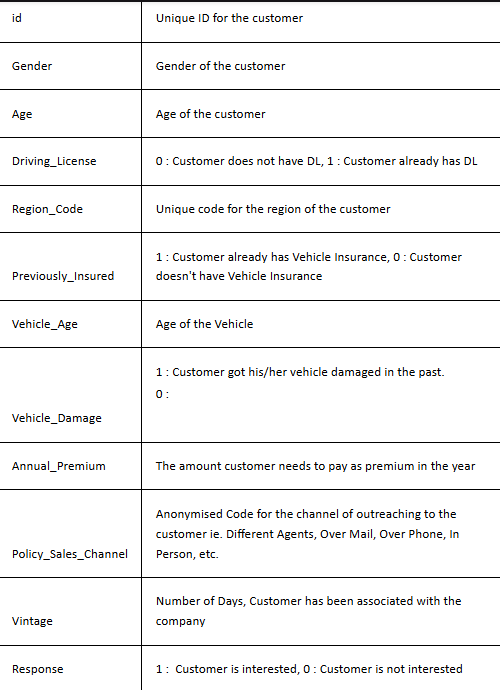

In [1]:
# load the required libraries for exploratory data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# load the dataset to the notebook
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
# checking  for missing values in the data
train.isnull().sum()


,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [6]:
test.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


## Observation:
there is no missing values present in the data

In [7]:
# checking for duplicated values
train.duplicated().sum()

0

# Observation:
there is no duplicated values in the data

In [8]:
# checking for unique values in the data
train.nunique()

,0
id,381109
Gender,2
Age,66
Driving_License,2
Region_Code,53
Previously_Insured,2
Vehicle_Age,3
Vehicle_Damage,2
Annual_Premium,48838
Policy_Sales_Channel,155


In [9]:
#checking basic information about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# observations:
1) the data does not contain any missing values and duplicatede values

2) work on vehicle_age column



# EXPLORATORY DATA ANALISYS

# univarient analysis

In [10]:
# working on numerical data
train.select_dtypes(include='number').columns


Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

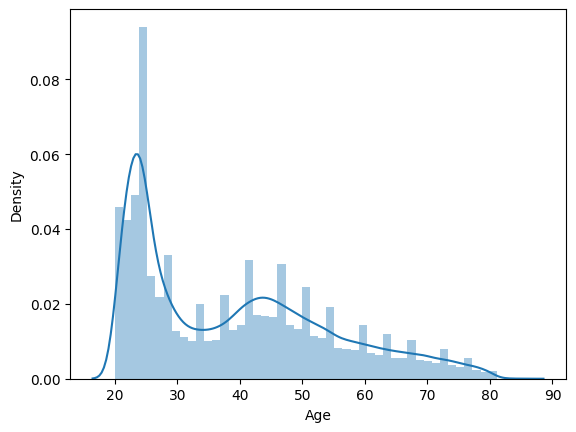

In [11]:
# checking for the distribution of the age
sns.distplot(train['Age'])
plt.show()

# observations:
1) the age data is not normally distrbuted it have right skewness

2) majority of the costumers are from the age group of 20-25

3)some coustomers are more from the age group of 40-45

4) some coustomers are very less from age 80-88

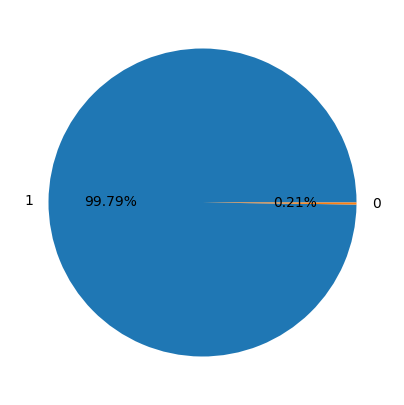

In [12]:
# lets check the percentage of the coustomers having driving license using pie chart
plt.figure(figsize=(5,5))
plt.pie(train['Driving_License'].value_counts(),labels=train['Driving_License'].value_counts().index,autopct='%1.2f%%')
plt.show()


# observations:
 1)99.79 majority of the coustomers has having driving license.

In [13]:
# value counts for the regional_code
train['Region_Code'].value_counts()

,count
Region_Code,
28.0,106415
8.0,33877
46.0,19749
41.0,18263
15.0,13308
30.0,12191
29.0,11065
50.0,10243
3.0,9251


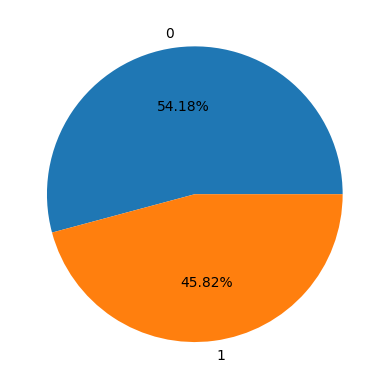

In [14]:
# working on Previously_Insured on pie chart
plt.pie(train['Previously_Insured'].value_counts(),labels=train['Previously_Insured'].value_counts().index,autopct='%1.2f%%')
plt.show()

# observations
 54.18% coustomers are previously not insured

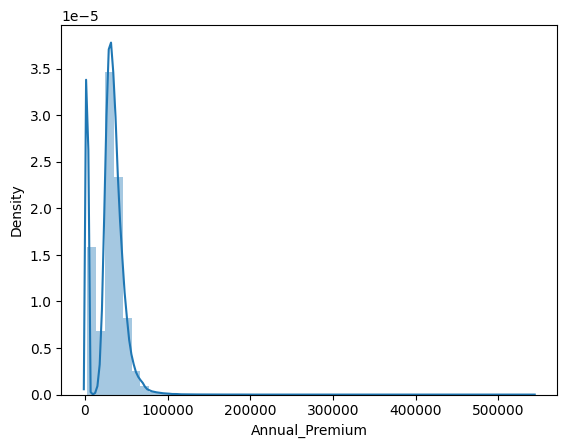

In [15]:
# checking the distribution of the anual primium
sns.distplot(train['Annual_Premium'])
plt.show()


# observation from the graph

1) most of the values are concentrated near the left side of the graph means low primium values

2) There is a steep peak close to the 0, indicating a high density of lower premium

3) there are very  few values in the higher range(abive 100,000)


the distribution is heavily skewed to the right, most individuals pay a relatively low primium ,but there are a few paying significantly higher amounts.

The long tail of the right suggests the presence of outliers or high-values premiums that occur rarely

In [16]:
train['Vintage'].value_counts()

,count
Vintage,
256,1418
73,1410
282,1397
158,1394
187,1392
...,...
205,1235
89,1234
32,1230


In [17]:
# working on categorical data
train.select_dtypes(include='object').columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

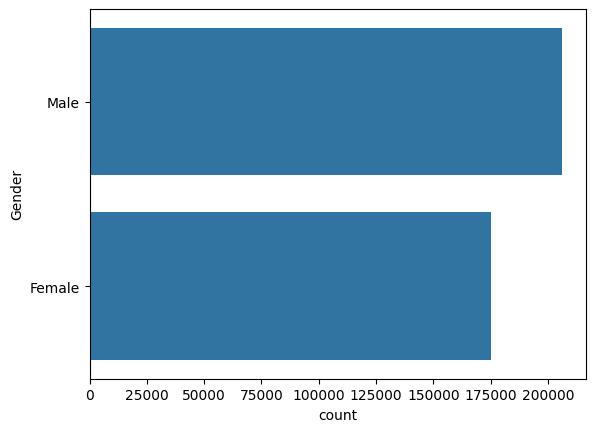

In [18]:
# ploting count plot for the gender
sns.countplot(train['Gender'])
plt.show()

there are more then 2 lakh male coustomers are there

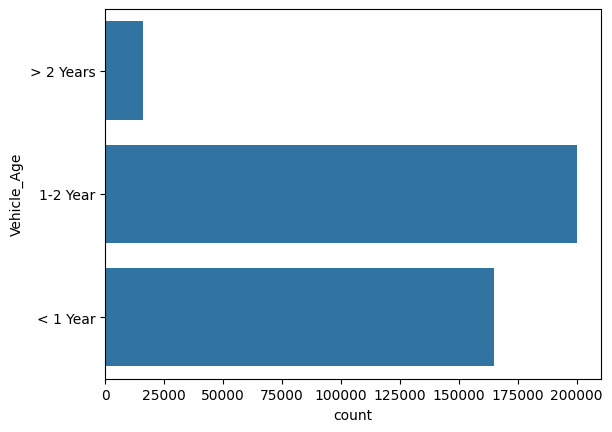

In [19]:
# count plot for vehicle age
sns.countplot(train['Vehicle_Age'])
plt.show()

the coustomer from vehicle age from 1-2 years are high

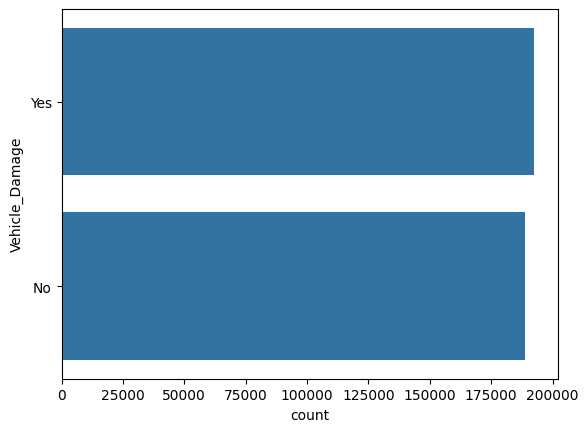

In [20]:
# countplot for vehicle damage
sns.countplot(train['Vehicle_Damage'])
plt.show()

# bivarient analysis

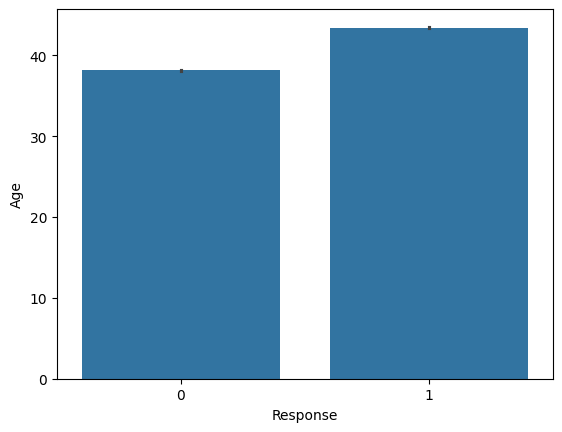

In [21]:
# checking the relationship between numerical features with categorical
# checking bargraph with age and responce
sns.barplot(x='Response',y='Age',data=train)
plt.show()


# observations:
the age group of 40 are showing intrest for taking premiums

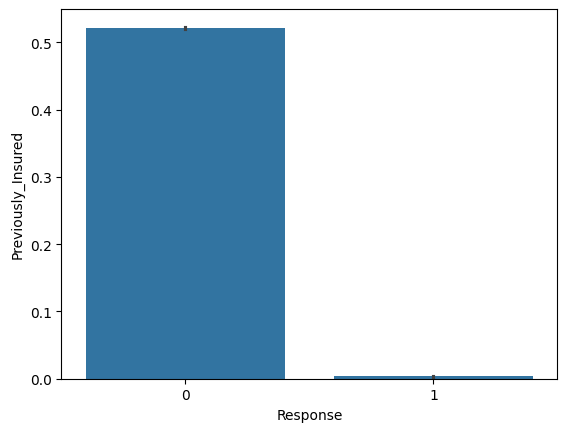

In [22]:
# bar graph for previously insured and responce
sns.barplot(x='Response',y='Previously_Insured',data=train)
plt.show()

In [23]:
# checking correlation
train.select_dtypes(include='number').corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


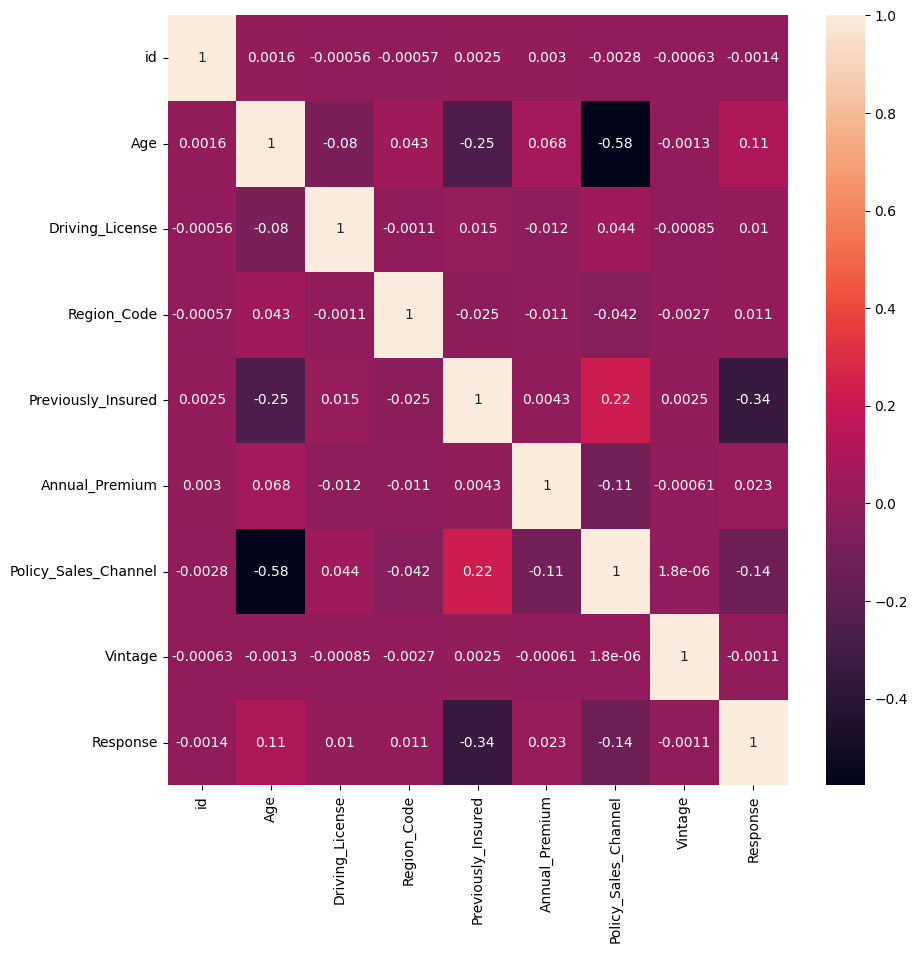

In [24]:
# ploting heatmap for the numerical data
plt.figure(figsize=(10,10))
sns.heatmap(train.select_dtypes(include='number').corr(),annot=True)
plt.show()